# Seaborn

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Функция, рисующая несколько траекторий синусов

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

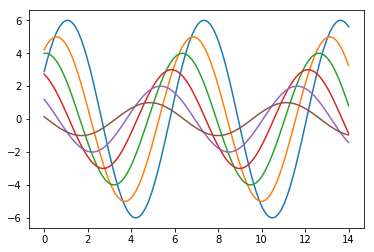

In [3]:
sinplot()

### Стили

`sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)` --- установка эстетических параметров графиков.

* `context` -- параметры контекста, влияет на размер меток, линий и других элементов, но не на общий стиль. Контекст: `notebook`, `paper`, `talk`, `poster`.
* `style` -- стиль осей: `darkgrid` (серый фон с сеткой), `whitegrid` (белый фон с сеткой), `dark` (серый фон без сетки), `white`  (белый фон без сетки), `ticks`
* `palette` -- цветовая палитра: `deep`, `muted`, `bright`, `pastel`, `dark`, `colorblind`, а так же палитры из `matplotlib`.
* `font` -- шрифт текста
* `font_scale` -- размер текста

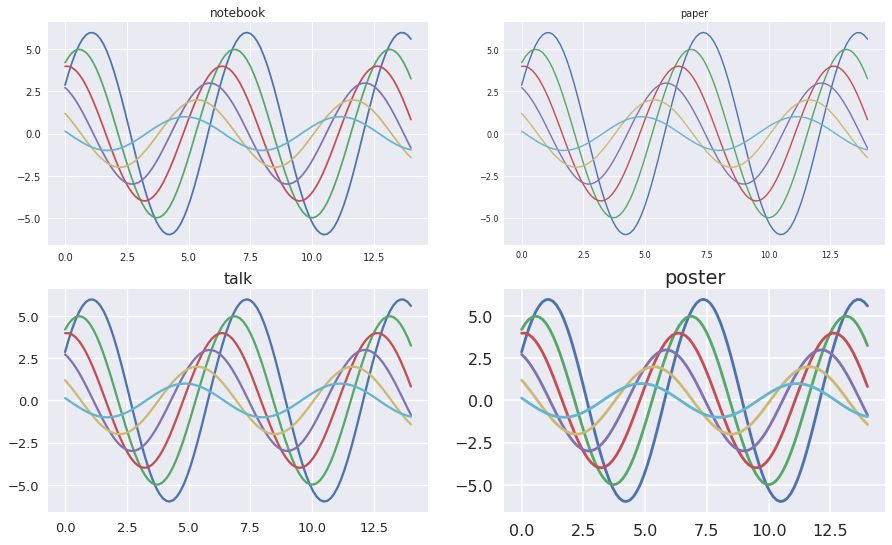

In [4]:
plt.figure(figsize=(15, 9))
for i, context in enumerate(['notebook', 'paper', 'talk', 'poster']):
    sns.set(context=context)
    plt.subplot(2, 2, i+1)
    sinplot()
    plt.title(context)

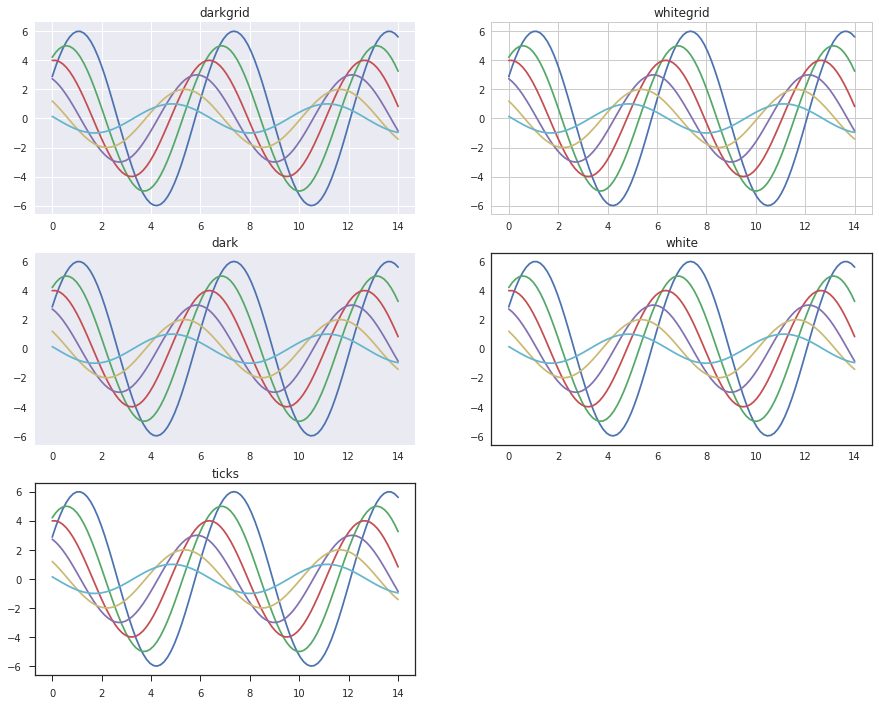

In [5]:
plt.figure(figsize=(15, 12))
for i, style in enumerate(['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']):
    sns.set(style=style)
    plt.subplot(3, 2, i+1)
    sinplot()
    plt.title(style)

In [6]:
sns.set()

Визуализация палитры

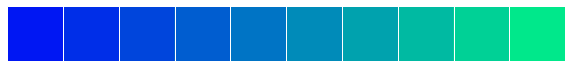

In [7]:
sns.palplot(sns.color_palette('winter', n_colors=10))

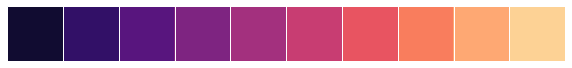

In [8]:
sns.palplot(sns.color_palette('magma', n_colors=10))

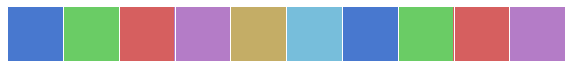

In [9]:
sns.palplot(sns.color_palette("muted", n_colors=10))

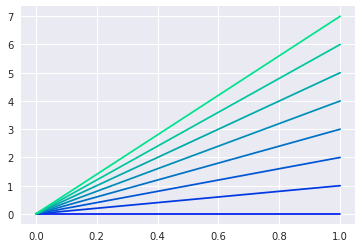

In [10]:
with sns.color_palette("winter", 8):
    plt.plot(np.c_[np.zeros(8), np.arange(8)].T)

Способ убрать границы с графиков, что невозможно в matplotlib

`sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)`
* `fig` -- фигура `matplotlib`. Если `None`, то текущая.
* `top`, `right`, `left`, `bottom` -- указатели границ

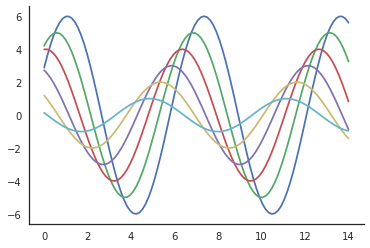

In [11]:
sns.set(style='white')
sinplot()
sns.despine()

### Оценки плотности

Построение и отрисовка KDE (в 1D или 2D):

`sns.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)`

* `data` -- выборка
* `data2` -- вторая координата в двумерном случае
* `shade` -- в 1D закрашивает область по графиком, в 2D закрашивает области между линиями уровня
* `vertical` -- повернуть
* `kernel` -- метка ядра. В 1D доступны `gau`, `cos`, `biw`, `epa`, `tri`, `triw`; в 2D только гауссовское.
* `bw` -- ширина ядра. Можно указать `scott`, `silverman` или число. В 2D можно указать пару чисел.
* `gridsize` -- размер сетки для отрисовки графика
* `cut` -- задает границы отрисовки kde: график будет нарисован на величину cut * bw от крайних точек
* `clip` -- нижняя и верхняя граница точек, по которым строится kde. Параметр имеет вид `(low, high)` в 1D и `((low_x, high_x), (low_y, high_y))` в 2D.
* `legend` -- отрисовка легенды
* `cumulative` -- если `True`, то рисует функцию распределения, соответствующую построенной KDE
* `shade_lowest` -- нужно ли закрашивать последний контур для 2D. Флаг `False` может быть полезен при отрисовке нескольких kde на одном графике
* `cbar` -- в 2D добавляет colorbar
* `cbar_kws` -- аргументы, соответствующие `fig.colorbar`
* `kwargs` -- другие аргументы, соответствующие `plt.plot` или `plt.contour`. Например, `color` -- цвет, `cmap` -- цветовая схема, `n_levels` -- количество линий уровня.


Гибко настраиваемый график оценки одномерного распределения по выборке.
Совмещает возможности функций `plt.hist`, `sns.kdeplot`, `sns.rugplot` и функций `fit` из `scipy.stats`.

`sns.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)`

* `a` -- выборка
* `bins` -- число бинов гистограммы. Если `None`, то выставляется по правилу Freedman-Diaconis
* `hist` -- отрисовка гистограммы
* `kde` -- отрисовка kde
* `rug` -- отрисовка точек выборки в виде штрихов
* `hist_kws`, `kde_kws`, `rug_kws` -- параметры гистограммы, kde и rugplot в виде словарей
* `fit` -- семейство распредений. Объект должен иметь метод `fit`, который вернет ОМП в виде `tuple`, и метод `pdf`, который по сетке посчитает плотность распределения с параметрами, соответствующими ОПМ. Например, подойдет распределение из `scipy.stats`
* `color` -- цвет
* `vertical` -- повернуть
* `norm_hist` -- нормированная гистограмма

In [12]:
sns.set()

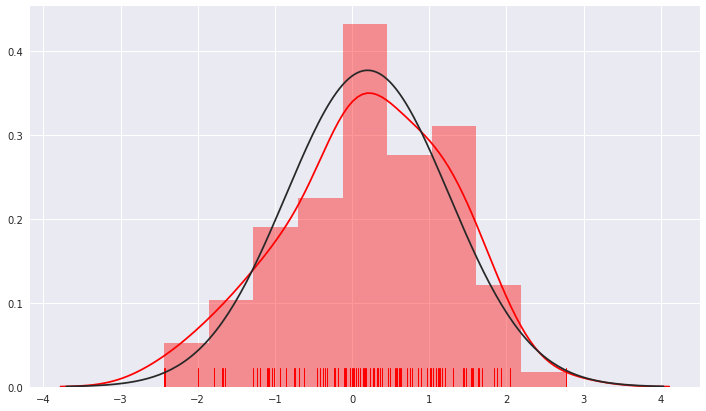

In [13]:
x = sps.norm.rvs(size=100)
plt.figure(figsize=(12, 7))
sns.distplot(x, rug=True, fit=sps.norm, color='red');

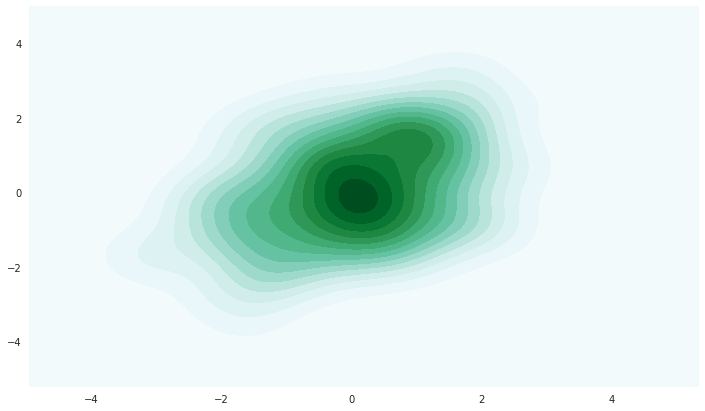

In [14]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=100).T

plt.figure(figsize=(12, 7))
sns.kdeplot(x, y, n_levels=15, shade=True);

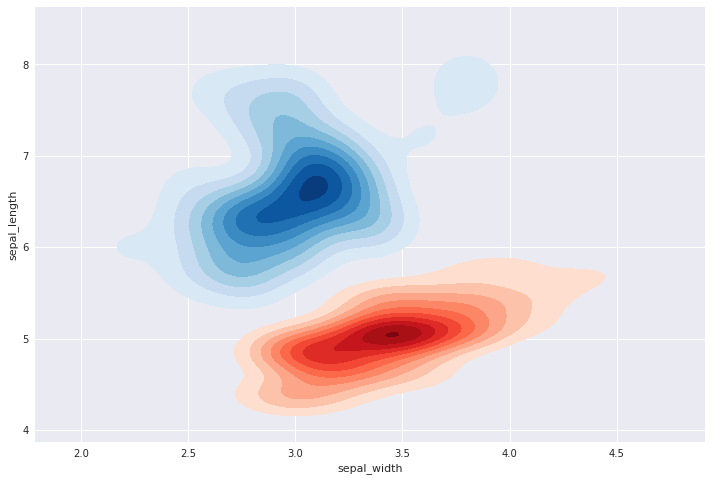

In [15]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]

plt.figure(figsize=(12, 8))
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, 
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length, 
                 cmap="Blues", shade=True, shade_lowest=False)

### Box plot 
Box plot --- график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

`seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)`

* `x`, `y`, `hue` -- одномерные данные или имена переменных из `data`
* `data` -- данные
* `orient`: `"v"` | `"h"` -- ориентация (вертикальная или горизонтальая)
* `color` и `palette` -- задают цвет

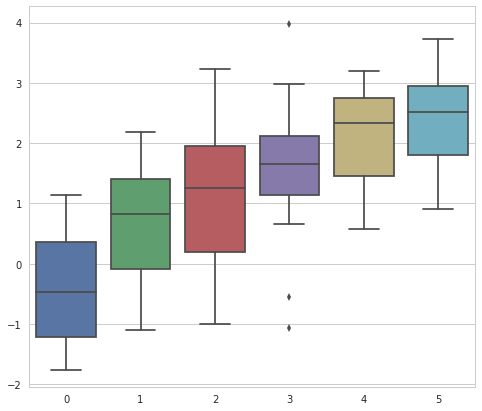

In [16]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

sns.set_style("whitegrid")
plt.figure(figsize=(8, 7))
sns.boxplot(data=data);

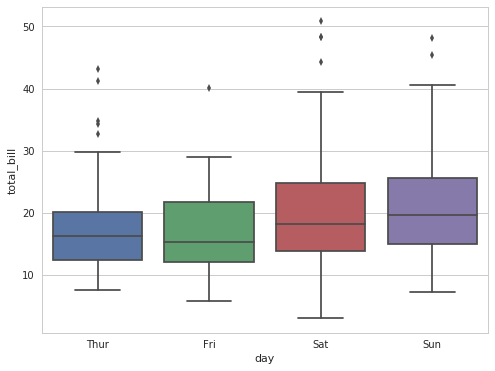

In [17]:
tips = sns.load_dataset("tips")

plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips);

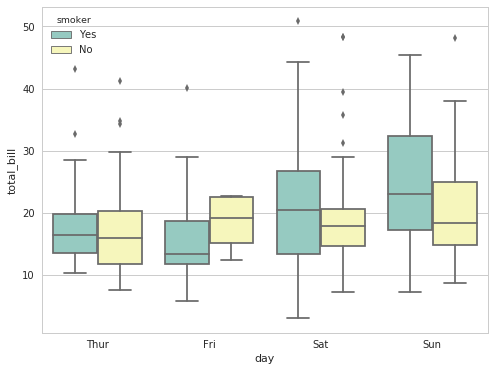

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3");

Сетка помогает при необходимости извлечения количественной информации из графика, и белый цвет сетки на сером фоне помогает избежать конкуренции сетки с линиями, представляющими данные. Тема `whitegrid` похожа, но лучше подходит для графиков с тяжелыми элементами:

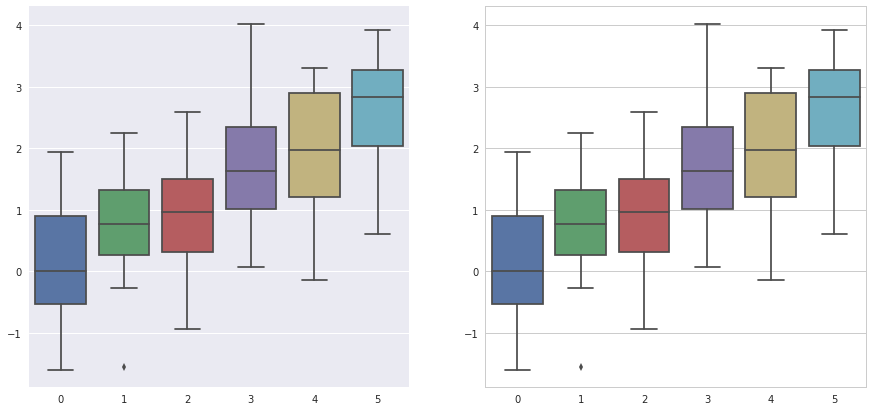

In [19]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(15, 7))
sns.set()
plt.subplot(121)
sns.boxplot(data=data)
sns.set_style("whitegrid")
plt.subplot(122)
sns.boxplot(data=data);

### Violin plot

Некоторая комбинация boxplot и ядерной оценки плотности. Внутри облака изображен обычный ящик с усами, только в сжатом виде и без выбросов. Форма облака соответствует ядерной оценке плотности.

`sns.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)`

* `x`, `y`, `hue` -- одномерные данные или имена переменных из `data`
* `data` -- данные
* `bw` -- ширина ядра
* `gridsize` -- размер сетки для отрисовки ядерной оценки плотности
* `orient`: `"v"` | `"h"` -- ориентация (вертикальная или горизонтальая)
* `color` и `palette` -- задают цвет

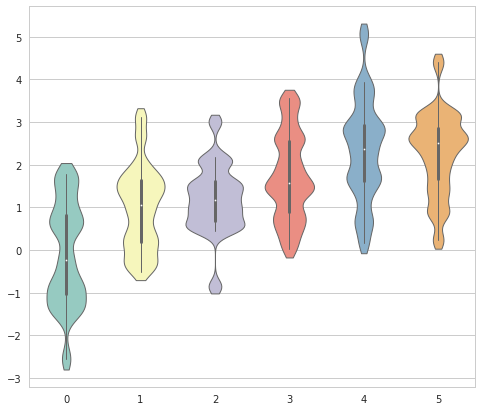

In [20]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.violinplot(data=data, palette="Set3", bw=.2, cut=1, linewidth=1);

### PairGrid

Сетка графиков для визуализации попарных отношений в данных.

`class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`

* `data` -- данные
* `hue` -- категории, которые будут закрашиваться в разные цвета
* `palette` -- цветовая схема, может быть задана в виде словаря цветов
* `size` -- высота каждой грани (в дюймах)

Возвращает объект, у которого доступны такие функции

* `map(func, **kwargs)`
* `map_diag(func, **kwargs)`
* `map_lower(func, **kwargs)`
* `map_offdiag(func, **kwargs)`
* `map_upper(func, **kwargs)`

В эти функции нужно передать функцию `func`, с помощью которой будет построен график по паре переменных (или по одной на диагонале), а так же параметры этой функции.

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


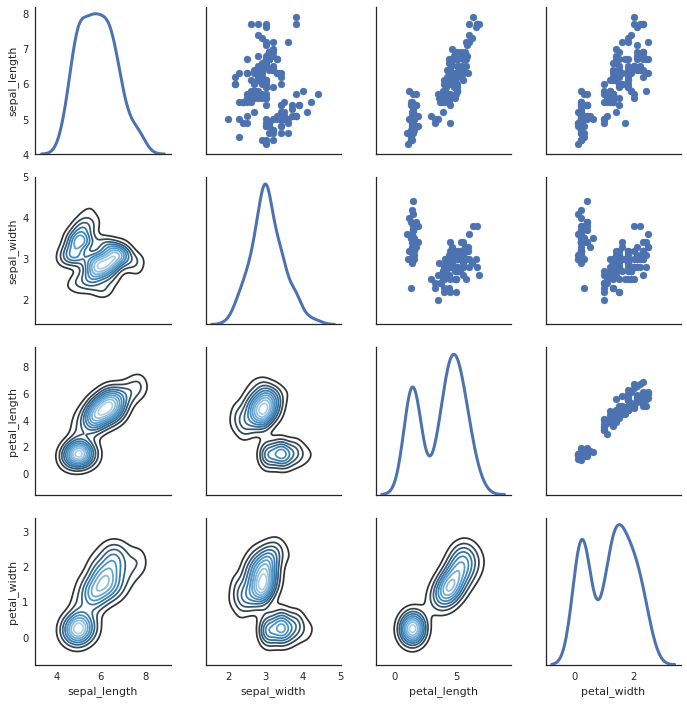

In [22]:
sns.set(style="white")

df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


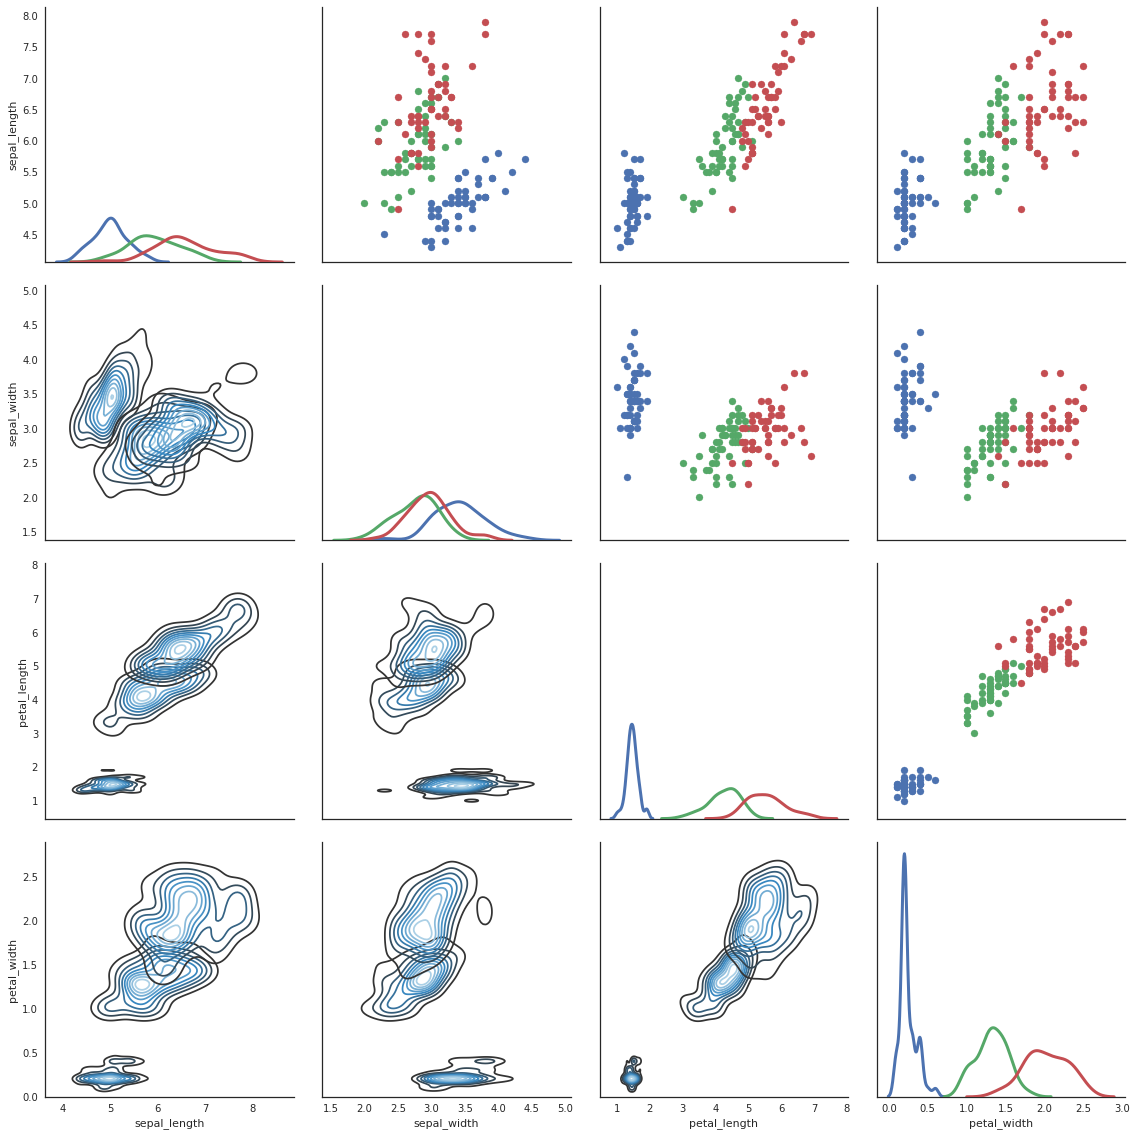

In [23]:
sns.set(style="white")

df = sns.load_dataset("iris")

g = sns.PairGrid(df, hue='species', size=4)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### Heatmap

Визуализирует двумерную таблицу в виде тепловой карты.

`sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)`

* `data` -- 2D-данные
* `vmin` и `vmax` -- минимальное и максимальное значения цветов
* `cmap` -- цветовая схема
* `robust` -- если не указханы `vmin` и `vmax`, то не используются выбросы при определении минимума и максимума
* `annot` -- в какие ячейки записывать данные
* `fmt` -- формат записи данных
* `linewidths` -- ширина линий между ячейками
* `linecolor` -- цвет линий между ячейками
* `cbar` -- рисовать ли colorbar

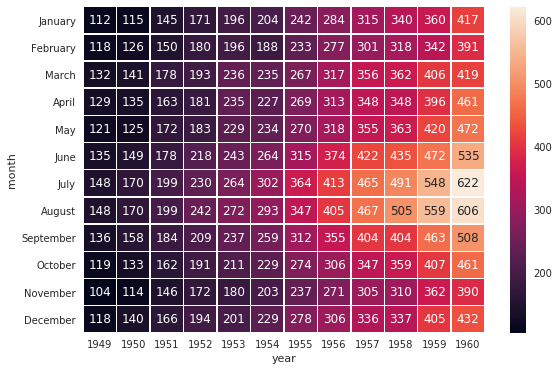

In [24]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot_table(index="month", columns="year", 
                                   values="passengers")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax);

### Jointplot

График двух переменных, соеднияющий функции 1D и 2D графиков.

`sns.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)`

* `x`, `y` -- данные или имена переменных в `data`
* `data` -- данные
* `kind` : { `"scatter"` | `"reg"` | `"resid"` | `"kde"` | `"hex"` } -- тип графика (точки, регрессия, остатки регрессии, ядерная оценка плотности, гексаэдры)
* `stat_func` -- функция-критерий, который возвращает статистику и pvalue. По умолчанию критерий для проверки некоррелированности на основе коэффициента корреляции Пирсона
* `color` -- цвет
* `size` -- размер фигуры
* `dropna` -- удаление пропущенных значений
* `xlim`, `ylim` -- ограничения по осям

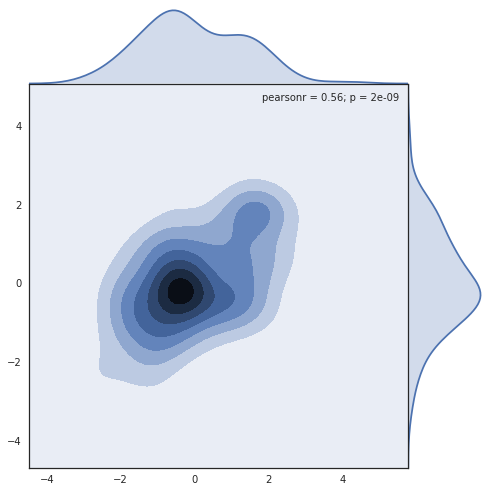

In [25]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=100).T

sns.set(style="white")
sns.jointplot(x, y, kind="kde", size=7, space=0);

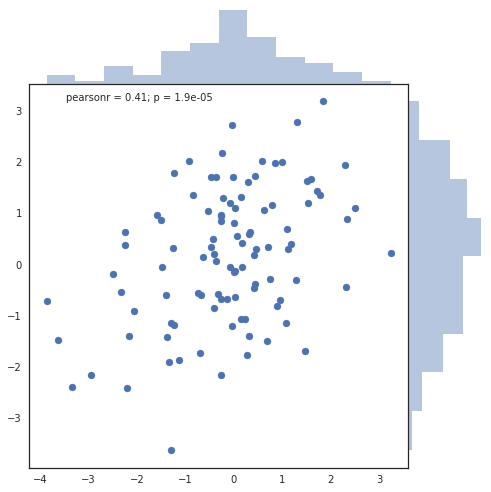

In [26]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=100).T

sns.set(style="white")
sns.jointplot(x, y, size=7, space=0);

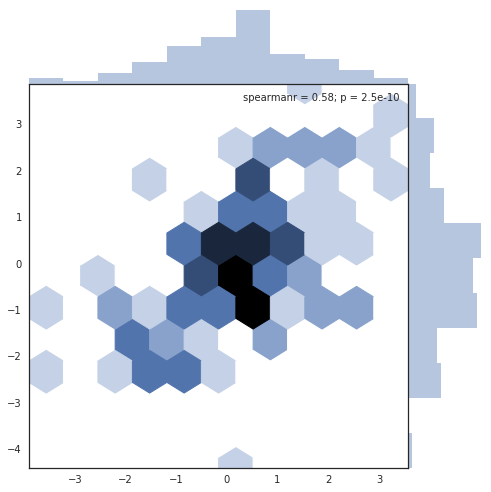

In [27]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=100).T

sns.set(style="white")
sns.jointplot(x, y, kind="hex", size=7, space=0, stat_func=sps.spearmanr);